**Check notebook (day 4 - Perceptron Trick) to see the algo that is used in this colab notebook**

In [1]:
# Generating a dataset

from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [6]:
# X has two columns as can be seen below
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [2]:
import matplotlib.pyplot as plt

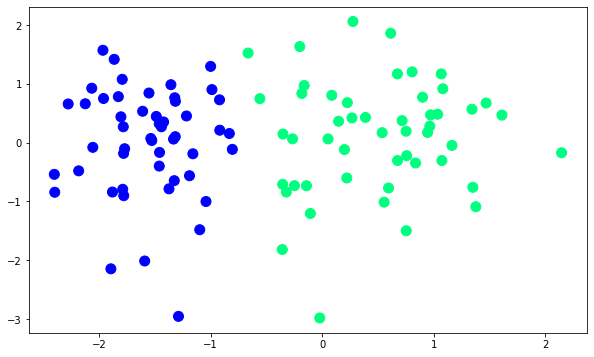

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [7]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)             # Adding a new colum of 1's before the first column
    weights = np.ones(X.shape[1])           # creating a new array weights (in whichc all the values are 1) whose shape is same as the number of columns in X (which is equal to 3 here). The three columns represent here w0, w1 and w2 values
    lr = 0.1                                # Learning Rate
    
    for i in range(1000):                    # epoch of 100
        j = np.random.randint(0,100)         # select a random student (or a datapoint) to check if he lies in positive region or negative region
        y_hat = step(np.dot(X[j],weights))   # = y^ = wi * xi. Step function we have defined below which returns 1 or 0 based on if the student was placed or not placed. Hence Y^ will store 0 or 1 based on output from step function
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]             # weights[0] = intercept, weights[1:] = coefficients in the equation


In [8]:
def step(z):
    return 1 if z>0 else 0

In [9]:
intercept_ , coef_ = perceptron(X,y)

In [10]:
print(coef_)
print(intercept_)

[1.22688286 0.11237709]
1.0


In [12]:
# In y = mx + b and Ax+ By + C = 0:
# m = -A/B
# b = -C/B
# Check the above concept from google

m = -(coef_[0]/coef_[1])          
b = -(intercept_/coef_[1])

In [13]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

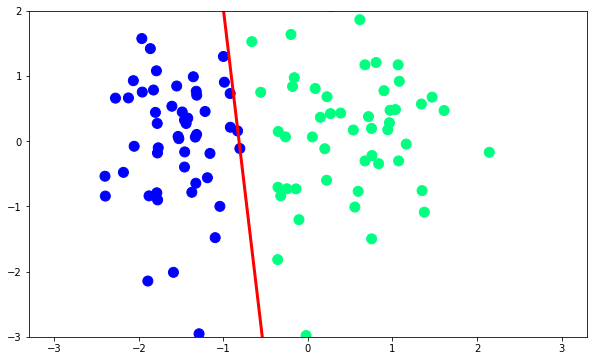

In [14]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)